

Fast Marching in 2D
===================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_matlab/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

In [102]:
!git clone https://github.com/TheoBertrand-Dauphine/MVA_NT_geodesic_methods
%cd MVA_NT_geodesic_methods

from __future__ import division
from nt_toolbox.general import *
from nt_toolbox.signal import *
from nt_toolbox.graph import *
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2

Cloning into 'MVA_NT_geodesic_methods'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (319/319), done.
remote: Compressing objects: 100% (295/295), done.
remote: Total 319 (delta 47), reused 262 (delta 21), pack-reused 0
Receiving objects: 100% (319/319), 21.51 MiB | 18.92 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/MVA_NT_geodesic_methods/MVA_NT_geodesic_methods
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'gamma', 'resize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Shortest Path for Isotropic Metrics
-----------------------------------
Shortest paths are 2D curves that minimize a weighted length according to
a given metric $W(x)$ for $x \in [0,1]^2$.
The metric is usually computed from an input image $f(x)$.


The length of a curve $ t \in [0,1] \mapsto \gamma(t) \in [0,1]^2 $ is
$$ L(\gamma) = \int_0^1 W(\gamma(t)) \norm{\gamma'(t)} \text{d} t. $$


Note that $L(\gamma)$ is invariant under re-parameterization of the
curve $\gamma$.


A geodesic curve $\gamma$ between two points $x_0$ and $x_1$ has minimum
length among curves joining $x_0$ and $x_1$,
$$ \umin{\ga(0)=x_0, \ga(1)=x_1} L(\ga). $$
A shortest curve thus tends to pass in areas where $W$ is small.



The geodesic distance between the two points is then
$d(x_0,x_1)=L(\gamma)$ is the geodesic distance according to the metric $W$.

Pixel values-based Geodesic Metric
----------------------------------
The geodesic distance map $D(x)=d(x_0,x)$ to a fixed starting point $x_0$
is the unique viscosity solution of
the Eikonal equation
$$ \norm{ \nabla D(x)} = W(x) \qandq D(x_0)=0. $$


This equation can be solved numerically in $O(N \log(N))$ operation on a discrete
grid of $N$ points.



We load the input image $f$.

In [103]:
n = 300;
name = 'nt_toolbox/data/road2.png';

import pandas as pd
import imageio
import numpy as np
from skimage.transform import resize

I = np.array(imageio.imread(name)) #we load the image and turn it into a numpy array
I = resize(I,(n,n))
print(I.shape)
print(type(I)) #

(300, 300)
<class 'numpy.ndarray'>


Display the image.

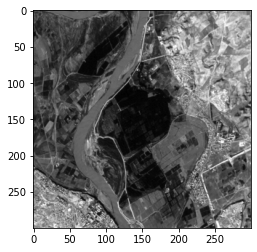

In [104]:
plt.imshow(I, cmap='gray') #the key cmap indicates the colormap that is used to display the image

Define start and end points $x_0$ and $x_1$ (note that you can use your own points).

In [105]:
x0 = np.array([[50],[148]])
x1 = np.array([[293],[141]])



The metric is defined according to $f$ in order to be low at pixel
whose value is close to $f(x)$. A typical example is
$$ W(x) = \epsilon + \abs{f(x_0)-f(x)} $$
where the value of $ \epsilon>0 $ should be increased in order to
obtain smoother paths.

In [106]:
epsilon = 1e-2;
W = epsilon + np.abs(I-I[x0[1,0],x0[0,0]]);
print(I[x0[0,0],x0[1,0]])

0.3837662745097977


Display the metric $W$.

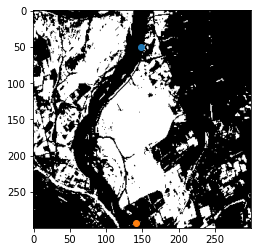

In [107]:
plt.imshow((W<0.2) + epsilon, cmap='gray')
plt.scatter(x0[1,:],x0[0,:])
plt.scatter(x1[1,:],x1[0,:])

Set options for the propagation: infinite number of iterations, and stop
when the front hits the end point.

Perform the propagation, so that $D(a,b)$ is the geodesic distance
between the pixel $x_1=(a,b)$ and the starting point $x_0$.
Note that the function |perform_fast_marching| takes as input the inverse
of the metric $1/W(x)$.

In [108]:
!pip3 install scikit-fmm
from nt_toolbox.perform_fast_marching import perform_fast_marching_isotropic as FM

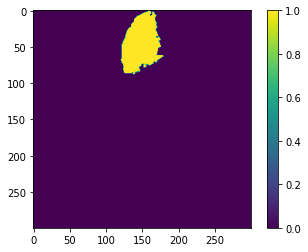

In [109]:
D = FM(W, x0)

plt.imshow(D<100); plt.colorbar()


Display the propagated distance map $D$.
We display in color the distance map in areas where the front has
propagated, and leave in black and white the area where the front did not
propagate.

__Exercise 1__

Display the progressive propagation.
This corresponds to displaying the front
$ \enscond{x}{D(x) \leq t} $ for various arrival times $t$.

Geodesic Curve Extraction
-------------------------
Once the geodesic distance map $D(x)$ to a starting point $x_0$ is
computed, the geodesic curve between any point $x_1$ and $x_0$
extracted through gradient descent
$$ \ga'(t) = - \eta_t \nabla D(\ga(t)), $$
where $\eta_t>0$ controls the parameterization speed of the resulting
curve. To obtain unit speed parameterization, one can use $\eta_t =
\norm{\nabla D(\ga(t))}^{-1}$.


Recompute the geodesic distance map $D$ on the whole grid.

In [110]:
D = FM(W, x0)

Display $D$.

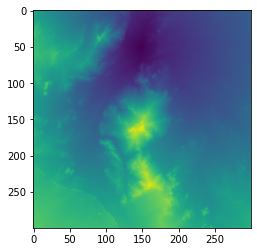

In [111]:
plt.imshow(D)

Compute the gradient $G_0(x) = \nabla D(x) \in \RR^2$ of the distance map. Use centered differences.

In [112]:
[Gx,Gy] = np.gradient(D) # numpy allows us to compute the gradient of the image by finite differences

Normalize the gradient to obtained $G(x) = G_0(x)/\norm{G_0(x)}$, in order to have unit speed geodesic curve (parameterized
by arc length).

In [113]:
Gnx = Gx/np.sqrt(Gx**2 + Gy**2)
Gny = Gx/np.sqrt(Gx**2 + Gy**2)

Display $G$.

(300, 300, 2)


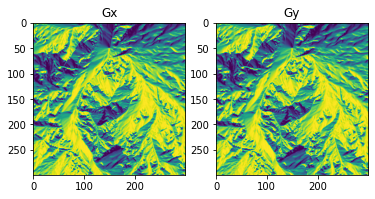

In [114]:
plt.subplot(1,2,1)
plt.imshow(Gnx)
plt.title('Gx')

plt.subplot(1,2,2)
plt.imshow(Gny)
plt.title('Gy')

G = np.dstack([Gnx,Gny])
print(G.shape)

The geodesic is then numerically computed using a discretized gradient
descent, which defines a discret curve $ (\ga_k)_k $ using
$$ \ga_{k+1} = \ga_k - \tau G(\ga_k) $$
where $\ga_k \in \RR^2$ is an approximation of $\ga(t)$ at time
$t=k\tau$, and the step size $\tau>0$ should be small enough.


Step size $\tau$ for the gradient descent.

In [115]:
tau = 1e-1

Initialize the path with the ending point.

In [116]:
gamma = x1

Define a shortcut to interpolate $G$ at a 2-D points.
_Warning:_ the |interp2| switches the role of the axis ...

In [117]:
from scipy.ndimage import map_coordinates

Compute the gradient at the last point in the path, using interpolation.

In [118]:
interpolation = lambda G, inds: np.vstack([map_coordinates(G[:,:,0], np.expand_dims(inds,axis=1)), map_coordinates(G[:,:,1], np.expand_dims(inds,axis=1))])
gamma = x1
g = interpolation(G, gamma[:,-1])
print(g.shape)

(2, 1)


Perform the descent and add the new point to the path.

In [119]:
np.concatenate((gamma, np.expand_dims(gamma[:,-1], axis=1) - tau*interpolation(G, gamma[:,-1])), axis=1) 

array([[293.        , 292.93872167],
       [141.        , 140.93872167]])

__Exercise 2__

Perform the full geodesic path extraction by iterating the gradient
descent. You must be very careful when the path become close to
$x_0$, because the distance function is not differentiable at this
point. You must stop the iteration when the path is close to $x_0$.

Display the curve on the image background.

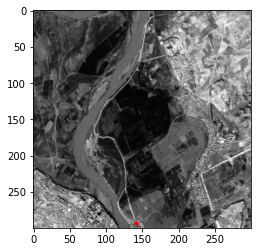

In [120]:
plt.imshow(I, cmap='gray')
plt.scatter(gamma[1,:], gamma[0,:], c='r', s=10)

Display the curve on the distance background.

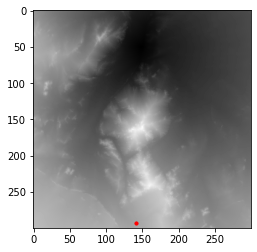

In [121]:
plt.imshow(D, cmap='gray')
plt.scatter(gamma[1,:], gamma[0,:], c='r', s=10)

__Exercise 3__

Study the influence of the $\epsilon$ parameter.

In [122]:
list_epsilon = [1e-1, 5*1e-1, 1, 10]

__Exercise 4__

Perform the shortest path
extraction for various images such as 'cavern' or 'mountain'.
oad
radient
isplay

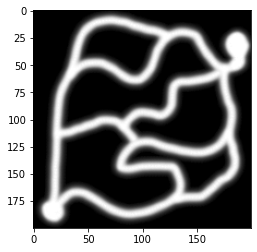

In [123]:
I = np.array(imageio.imread('nt_toolbox/data/cavern.png')) # change 'cavern' to any other image contained in the data folder
plt.imshow(I, cmap='gray')

Edge-based Geodesic Metric
--------------------------
It is possible to extract the boundary of an object using shortest paths
that follows region of high gradient.


First we load an image $f$.

In [124]:
n=256
I = np.array(imageio.imread('nt_toolbox/data/cortex.bmp'))
I = resize(I,(n,n))[:,:,0]
print(I.shape)

(256, 256)


Display it.

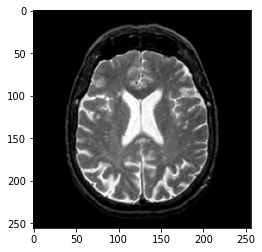

In [125]:
plt.imshow(I, cmap='gray')

An edge-attracting potential $W(x)$ should be small
in regions of high gradient. A popular choice is
$$ W(x) = \frac{1}{\epsilon + G_\si \star G(x)}$
 \qwhereq G(x) = \norm{\nabla f(x)}, $$
and where $G_\si$ is a Gaussian kernel of variance $\si^2$.


Compute the gradient norm $G(x)$.

In [126]:
print(I.shape)
[Gx,Gy] = np.gradient(I)
G = np.dstack([Gx, Gy])
print(np.sum(G**2,axis=2).shape)
G = G/(np.sqrt(np.sum(G**2, axis=2, keepdims=True)))

(256, 256)
(256, 256)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Smooth it by $G_\si$.

In [127]:
#from nt_toolbox.perform_blurring import perform_blurring
from scipy.ndimage.filters import gaussian_filter
BlurredGx = gaussian_filter(Gx, sigma=3)
BlurredGy = gaussian_filter(Gy, sigma=3)

Display the smoothed gradient $ G \star G_\si $.

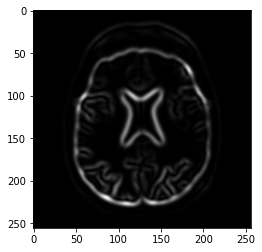

In [128]:
plt.imshow(BlurredGx**2+BlurredGy**2, cmap='gray')

Compute the metric.

In [129]:
epsilon = 0.01;
W = 1/( epsilon + BlurredGx**2+BlurredGy**2 );

Display it.

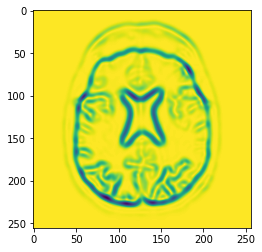

In [130]:
plt.imshow(W)

Set two starting point $ \Ss = \{x_0^1,x_0^2\} $ (you can use other points).

In [140]:
x0 = np.array([[136,53],[123,205]]).T

Compute the Fast Marching from these two base points.

In [145]:
D = FM(1/W, x0)

Display the geodesic distance (with color normalization).

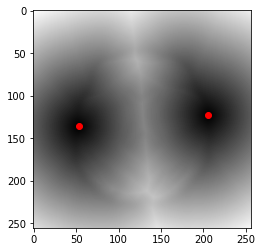

In [146]:
plt.imshow((D), cmap='gray')
plt.scatter(x0[1,:],x0[0,:], c='r')

The Voronoi segmentation associated to $\Ss$ is
$$ \Cc_i = \enscond{x}{ \forall j \neq i, \; d(x_0^i,x) \leq d(x_0^j,x) }. $$


This Voronoi segmentation is computed during the Fast Marching
propagation and is encoded in the partition function $Q(x)$
using $\Cc_i = \enscond{x}{Q(x)=i}$.


Display the distance and the Voronoi segmentation.

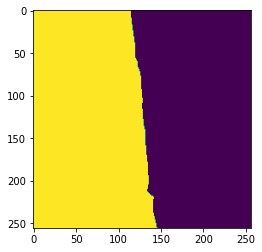

In [154]:
# FM doesn't give us directly the voronoi cells so we'll compute the geodesic distance from both source points seprately
D1 = FM(1/W, np.expand_dims(x0[:,0], axis=1))
D2 = FM(1/W, np.expand_dims(x0[:,1], axis=1))

Q = (D1<D2).astype(np.float) - (D1>D2).astype(np.float)
plt.imshow(Q)

__Exercise 5__

Extract the set of points that are along the boundary of the Voronoi
region. This corresponds for instance to the points of the region
$ \enscond{x}{Q(x)=1} $
that have one neighbor inside the region
$ \enscond{x}{Q(x)=2} $.
Compute the geodesic distance $D(x)$ at these points, and choose two points
$a$ and $b$ on this boundary that have small values of $D$.
int: you can use a convolution |U=conv2(double(Q==2),h,'same')| with a
ell chose kernel |h| to located the points |U>0| with at least 1
eighbor.

ubplot(2,1,1);

__Exercise 6__

Extract the geodesics joining $a$ and $b$ to the two starting points
(this makes 4 geodesic curves). Use them to perform segmentation.
 D1 = D; D1(D1==Inf) = max(D1(D1~=Inf));
isplay the curves

Vessel Segmentation and Centerline Extraction
---------------------------------------------
One can extract a network of geodesic curve starting from a central point
to detect vessels in medical images.


Load an image. This image is extracted from the
 <http://www.isi.uu.nl/Research/Databases/DRIVE/ DRIVE database> of
 retinal vessels.

Display it.

We clean the image by substracting the smoothly varying background
$$ f_1 = f - G_\si \star f, $$
where $G_\si$ is a Gaussian kernel of variance $\si^2$.
Computing $f_1$ corresponds to a high pass filtering.

Display this normalized image.

We compute a metric tthat is small for large values of $f_1$:
$$ W(x) = \epsilon +  \abs{f_1(x)-c}$
      \qwhereq c = \umax{x} f_1(x). $$

Display the metric.

Select a central point $x_0$ for the network.

__Exercise 7__

Perform partial propagations from $x_0$.

__Exercise 8__

Extract geodesics joining several points $x_1$ to the central point
$x_0$.
radient
xtract centerlines
isplay the curves

Dual Propagation
----------------
In order to speed up geodesic extraction, one can perform the propagation
from both the start point $x_0^1$ and end point $x_0^2$.


Boundary points.

In [131]:
x0 = [[143;249] [174;9]];

SyntaxError: ignored

__Exercise 9__

Perform the dual propagation, and stop it when the front meet.
Extract the two half geodesic curves.
ual propagation.
xtract first the geodesic paths
terations